<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW6/HW6_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Name: Sachin Gupta (sg758253@sju.edu)
* Date: 04/18/22
* Assignment: 6
* Reference: 
1. http://mercury.webster.edu/aleshunas/R_learning_infrastructure/Classification%20of%20data%20using%20decision%20tree%20and%20regression%20tree%20methods.html

2. https://rpubs.com/minma/cart_with_rpart

3. https://rstudio-pubs-static.s3.amazonaws.com/248300_37e2d6aefc9141e2baff655f9c9eb1cd.html

In [1]:
# instaling required lib
install.packages("caret")
#install.packages('party')
install.packages("C50")
install.packages("rpart.plot")  


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# importing lib
library(caret)
library(ggplot2)
library(repr)
library(rpart)
library(rpart.plot)
library(C50)
library(party)


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



In [3]:
# import dataset
trainingDF <- read.csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW6/Loans_Training.csv")
testDF <- read.csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW6/Loans_Test.csv")

In [4]:
# display rows
head(trainingDF)

,Approval,Debt.to.Income.Ratio,FICO.Score,Request.Amount,Interest
,<lgl>,<dbl>,<int>,<int>,<dbl>
1,FALSE,0,397,1000,450
2,FALSE,0,403,500,225
3,FALSE,0,408,1000,450
4,FALSE,0,408,2000,900
5,FALSE,0,411,5000,2250
6,FALSE,0,413,5000,2250


In [5]:
# summary of dataset
summary(trainingDF)

  Approval       Debt.to.Income.Ratio   FICO.Score  Request.Amount 
 Mode :logical   Min.   :0.0000       Min.   :371   Min.   :  500  
 FALSE:75066     1st Qu.:0.0900       1st Qu.:647   1st Qu.: 6000  
 TRUE :75236     Median :0.1600       Median :684   Median :11000  
                 Mean   :0.1835       Mean   :672   Mean   :13427  
                 3rd Qu.:0.2400       3rd Qu.:714   3rd Qu.:19000  
                 Max.   :1.0300       Max.   :869   Max.   :44000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6042  
 3rd Qu.: 8550  
 Max.   :19800  

In [6]:
# check null values in trainingDF
sum(is.na(trainingDF))

[1] 0

In [7]:
# check null values in testDF
sum(is.na(testDF))

[1] 0

No null value is present, so no need for encoding

In [8]:
# shape of the data frame

dim(trainingDF)

[1] 150302      5

In [9]:
# Column names
colnames(trainingDF)

[1] "Approval"             "Debt.to.Income.Ratio" "FICO.Score"          
[4] "Request.Amount"       "Interest"

In [10]:
# Describe the structure of the data frame

str(trainingDF)

'data.frame':	150302 obs. of  5 variables:
 $ Approval            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt.to.Income.Ratio: num  0 0 0 0 0 0 0 0 0 0 ...
 $ FICO.Score          : int  397 403 408 408 411 413 416 421 422 432 ...
 $ Request.Amount      : int  1000 500 1000 2000 5000 5000 6000 2000 12000 10000 ...
 $ Interest            : num  450 225 450 900 2250 2250 2700 900 5400 4500 ...


In [11]:
str(testDF)

'data.frame':	49698 obs. of  5 variables:
 $ Approval            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt.to.Income.Ratio: num  0 0 0 0 0 0 0 0 0 0 ...
 $ FICO.Score          : int  413 449 454 456 457 457 459 461 461 462 ...
 $ Request.Amount      : int  2000 1000 6000 1000 1000 8000 8000 500 6000 19000 ...
 $ Interest            : num  900 450 2700 450 450 3600 3600 225 2700 8550 ...


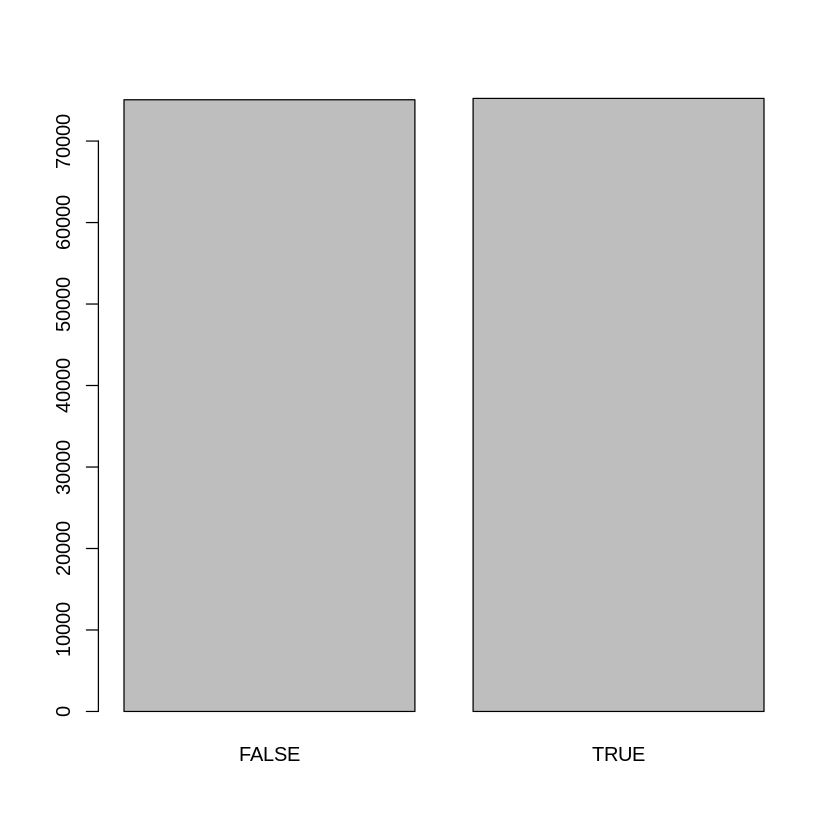

In [12]:
# Simple Bar Plot to see count of TRUE and False value of Approval class
counts <- table(trainingDF$Approval)
barplot(counts)

# **Creating cart model on traning data**

In [13]:
cart_train1 <- rpart(Approval~., data = trainingDF, cp=.01)

In [14]:
print(cart_train1)

n= 150302 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 150302 37575.450 0.50056550  
   2) FICO.Score< 659.5 46002  1736.941 0.03930264 *
   3) FICO.Score>=659.5 104300 21734.120 0.70400770  
     6) Debt.to.Income.Ratio>=0.305 12873  1460.011 0.13042800 *
     7) Debt.to.Income.Ratio< 0.305 91427 15442.670 0.78476820  
      14) Request.Amount>=25500 10828  2601.857 0.59854080 *
      15) Request.Amount< 25500 80599 12414.840 0.80978670 *


# Visualize the decision tree for cart model

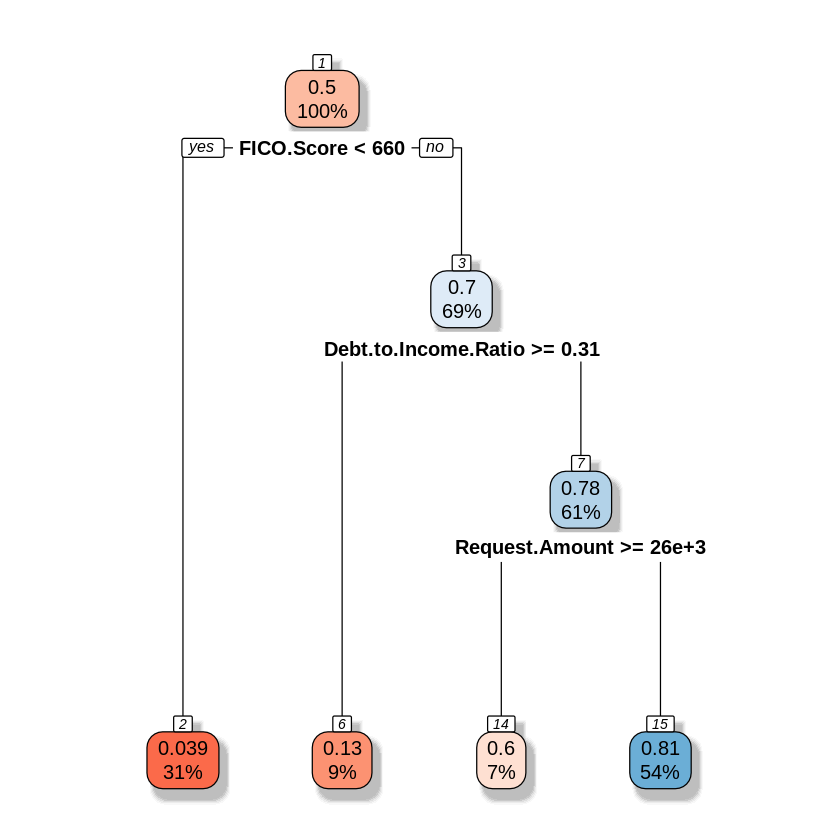

In [35]:
rpart.plot(cart_train1, box.palette="RdBu", shadow.col="gray", nn=TRUE)

# Description for cart on train model:
1. We are getting root node as Fico.score in this Cart model.
2. Root node is being divide into two group. decision tree is indicating that if Fico.score value is less than 659.5, then bank will approve. the percent of approval loan is 31%. The tree will continue to grow if the value is equal to or greater than 659.5.
3. At the next level we are getting Debt.to.income.ratio node as primary node, which is also being divide into two groups. if Debt.to.Income.Ratio>=0.305 then bank will approve, which is approx 9%. If Debt.to.Income.Ratio < 0.305 then trww will still grow.
4. The tree will grow in the same way. In the next level We are getting Request.Amount as primary node. this Node is also getting devided in two parts as before.
5. Finally, decision tree is showing that 54% loans are rejected.

# Confusion matrix for cart model

In [16]:
your_threshold <- 0.5
cart_model_prediction1 <- predict(cart_train1, trainingDF, type = "vector") >= your_threshold
confusionMatrix(table(trainingDF$Approval, cart_model_prediction1))


Confusion Matrix and Statistics

       cart_model_prediction1
        FALSE  TRUE
  FALSE 55388 19678
  TRUE   3487 71749
                                         
               Accuracy : 0.8459         
                 95% CI : (0.844, 0.8477)
    No Information Rate : 0.6083         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6917         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9408         
            Specificity : 0.7848         
         Pos Pred Value : 0.7379         
         Neg Pred Value : 0.9537         
             Prevalence : 0.3917         
         Detection Rate : 0.3685         
   Detection Prevalence : 0.4994         
      Balanced Accuracy : 0.8628         
                                         
       'Positive' Class : FALSE          
                                     

# Accuracy for cart model 

In [17]:
cart_model_accuracy1 <- sum( cart_model_prediction1 == trainingDF$Approval ) / length( cart_model_prediction1 )* 100
cat('Cart model accuracy on trainingDF is : ',cart_model_accuracy1)


Cart model accuracy on trainingDF is :  84.5877

We are getting 84.58 percent of accuracy using cart model on trainingDF.

# **Creating cart model on testing data**

In [18]:
cart_test1 <- rpart(Approval~., data = testDF, cp=.01)

In [19]:
print(cart_test1)

n= 49698 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 49698 12424.3500 0.49828970  
   2) FICO.Score< 660.5 15481   692.8595 0.04696079  
     4) FICO.Score< 651.5 13309   137.5483 0.01044406 *
     5) FICO.Score>=651.5 2172   428.8177 0.27071820 *
   3) FICO.Score>=660.5 34217  7151.3180 0.70248710  
     6) Debt.to.Income.Ratio>=0.305 4239   476.4152 0.12903990 *
     7) Debt.to.Income.Ratio< 0.305 29978  5083.8320 0.78357460  
      14) Request.Amount>=24500 4067   983.7226 0.59011560 *
      15) Request.Amount< 24500 25911  3924.0050 0.81394000 *


#Visualize the decision tree for cart model (testDF)

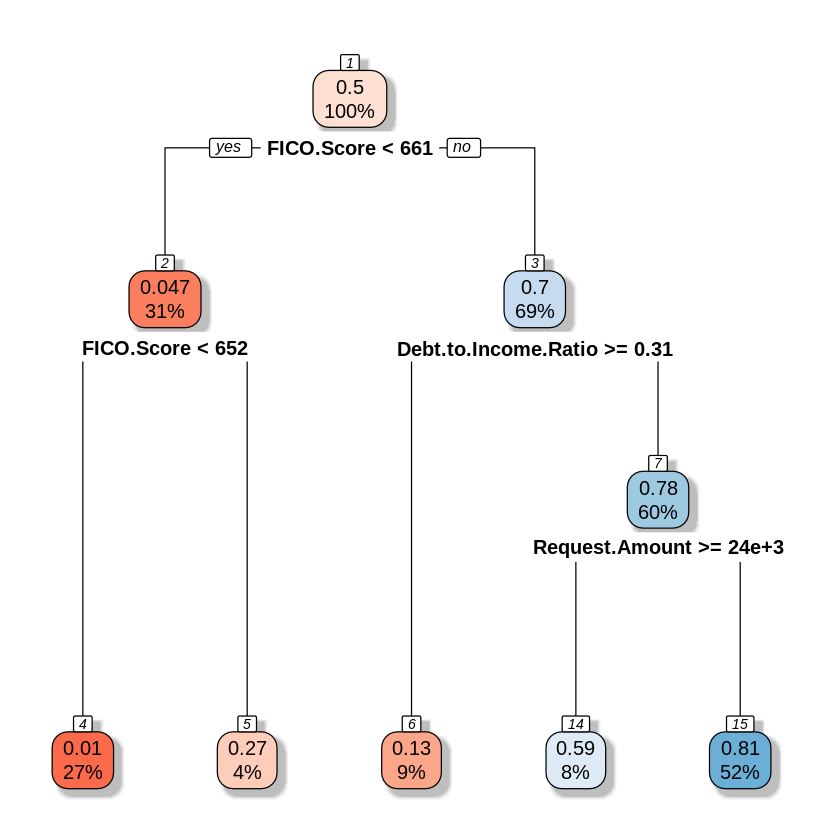

In [20]:
rpart.plot(cart_test1, box.palette="RdBu", shadow.col="gray", nn=TRUE)

#Confusion matrix for cart model on testDF

In [21]:
your_threshold <- 0.5
cart_model_prediction2 <- predict(cart_test1, testDF, type = "vector") >= your_threshold
confusionMatrix(table(testDF$Approval, cart_model_prediction2))


Confusion Matrix and Statistics

       cart_model_prediction2
        FALSE  TRUE
  FALSE 18446  6488
  TRUE   1274 23490
                                         
               Accuracy : 0.8438         
                 95% CI : (0.8406, 0.847)
    No Information Rate : 0.6032         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6879         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9354         
            Specificity : 0.7836         
         Pos Pred Value : 0.7398         
         Neg Pred Value : 0.9486         
             Prevalence : 0.3968         
         Detection Rate : 0.3712         
   Detection Prevalence : 0.5017         
      Balanced Accuracy : 0.8595         
                                         
       'Positive' Class : FALSE          
                                     

#Accuracy for cart model on testDF

In [22]:
cart_model_accuracy2 <- sum( cart_model_prediction2 == testDF$Approval ) / length( cart_model_prediction2 )* 100
cat('Cart model accuracy is : ',cart_model_accuracy2)


Cart model accuracy is :  84.38167

We are getting 84.38 percent of accuracy using cart model on testDF.

# **Creating C5.0 model on trainDF**

In [23]:
c5_model_train1 <- C5.0(x = trainingDF[, -1], y = as.factor(trainingDF$Approval),
             control=C5.0Control(minCases=1000))
summary(c5_model_train1)


Call:
C5.0.default(x = trainingDF[, -1], y = as.factor(trainingDF$Approval),
 control = C5.0Control(minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Wed Apr 20 04:03:09 2022
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

Decision tree:

Debt.to.Income.Ratio > 0.31: FALSE (19884/1160)
Debt.to.Income.Ratio <= 0.31:
:...FICO.Score <= 655: FALSE (35346/894)
    FICO.Score > 655:
    :...FICO.Score <= 669:
        :...Request.Amount > 23000: FALSE (1547/529)
        :   Request.Amount <= 23000:
        :   :...FICO.Score <= 661: FALSE (3246/1418)
        :       FICO.Score > 661: TRUE (5892/2056)
        FICO.Score > 669:
        :...Debt.to.Income.Ratio <= 0.25: TRUE (75846/13356)
            Debt.to.Income.Ratio > 0.25:
            :...Request.Amount <= 25000: TRUE (7112/2658)
                Request.Amount > 25000: FALSE (1429/455)


Evaluation on training data (150302 cases):

	    Decision Tree   
	  

# Decision Tree for C5.0 model

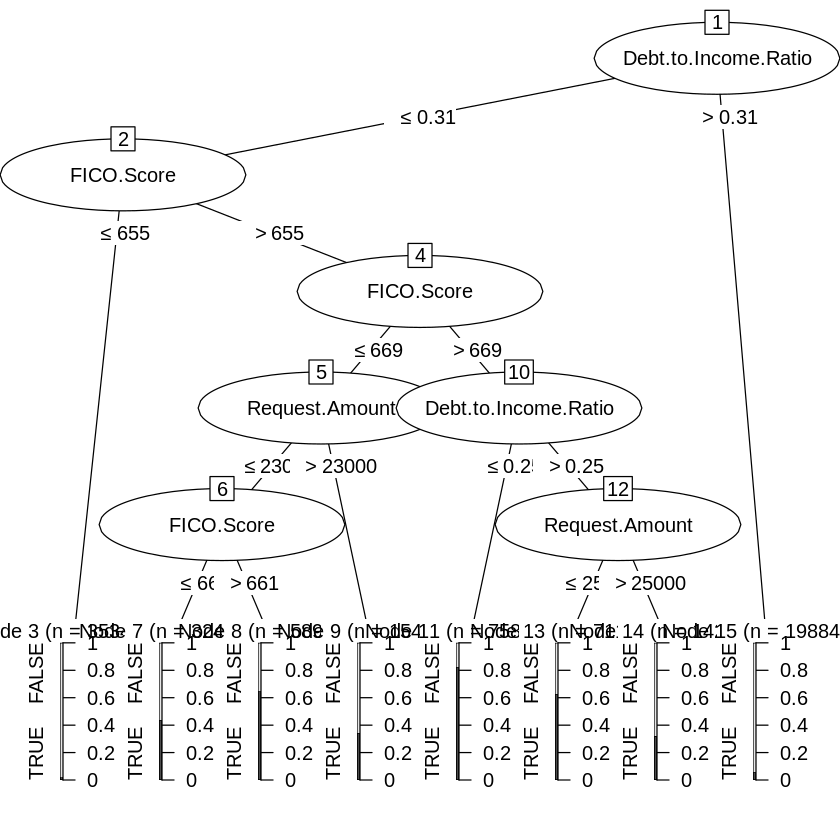

In [24]:
plot(c5_model_train1)

# Description for c5 on train model:
1. We are getting root node as Dept.to.income.ratio in this Cart model.
2. Root node is being divide into two group. As decision tree is indicating that if Debt.to.Income.Ratio > 0.31, then loan is being rejected.The tree will continue to grow if the Debt.to.Income.Ratio <= 0.31.
3. At the next level we are getting Fico.score as primary node, which is also being divide into two groups. if FICO.Score <= 655 then bank is rejecting loan.
 The tree will continue to grow if the FICO.Score > 655.
4. The tree will grow in the same way. In the next level We are getting Fico.score as primary node. this Node is also getting devided in two parts as before and so on.

# Display confusion matrix 

In [25]:
c5_model_prediction1 <- predict(c5_model_train1, trainingDF, type = "class") 
confusionMatrix(table(trainingDF$Approval, c5_model_prediction1))

Confusion Matrix and Statistics

       c5_model_prediction1
        FALSE  TRUE
  FALSE 56996 18070
  TRUE   4456 70780
                                          
               Accuracy : 0.8501          
                 95% CI : (0.8483, 0.8519)
    No Information Rate : 0.5911          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7002          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9275          
            Specificity : 0.7966          
         Pos Pred Value : 0.7593          
         Neg Pred Value : 0.9408          
             Prevalence : 0.4089          
         Detection Rate : 0.3792          
   Detection Prevalence : 0.4994          
      Balanced Accuracy : 0.8621          
                                          
       'Positive' Class : FALSE           
                   

# Accuracy for c5.0 model

In [26]:
c5_model_accuracy1 <- sum( c5_model_prediction1 == trainingDF$Approval ) / length( c5_model_prediction1 )* 100
cat('C5 model accuracy is : ',c5_model_accuracy1)

C5 model accuracy is :  85.01284

We are getting 85.01 percent of accuracy using C5 model on trainingDF.

# **Creating C5.0 model on testDF**

In [27]:
c5_model_test1 <- C5.0(x = testDF[, -1], y = as.factor(testDF$Approval),
             control=C5.0Control(minCases=1000))
summary(c5_model_test1)


Call:
C5.0.default(x = testDF[, -1], y = as.factor(testDF$Approval), control
 = C5.0Control(minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Wed Apr 20 04:03:13 2022
-------------------------------

Class specified by attribute `outcome'

Read 49698 cases (5 attributes) from undefined.data

Decision tree:

FICO.Score <= 655: FALSE (14182/311)
FICO.Score > 655:
:...Debt.to.Income.Ratio > 0.33: FALSE (3379/136)
    Debt.to.Income.Ratio <= 0.33:
    :...Debt.to.Income.Ratio > 0.26:
        :...Request.Amount <= 20000: TRUE (2294/1056)
        :   Request.Amount > 20000: FALSE (1003/327)
        Debt.to.Income.Ratio <= 0.26:
        :...FICO.Score > 666: TRUE (26520/4938)
            FICO.Score <= 666:
            :...FICO.Score <= 661: FALSE (1138/480)
                FICO.Score > 661: TRUE (1182/492)


Evaluation on training data (49698 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     7 7740(15.6%)   <<


	   (a)   (b)    <-classified as
	  ----  --

# Decision Tree for C5.0 model on testDF

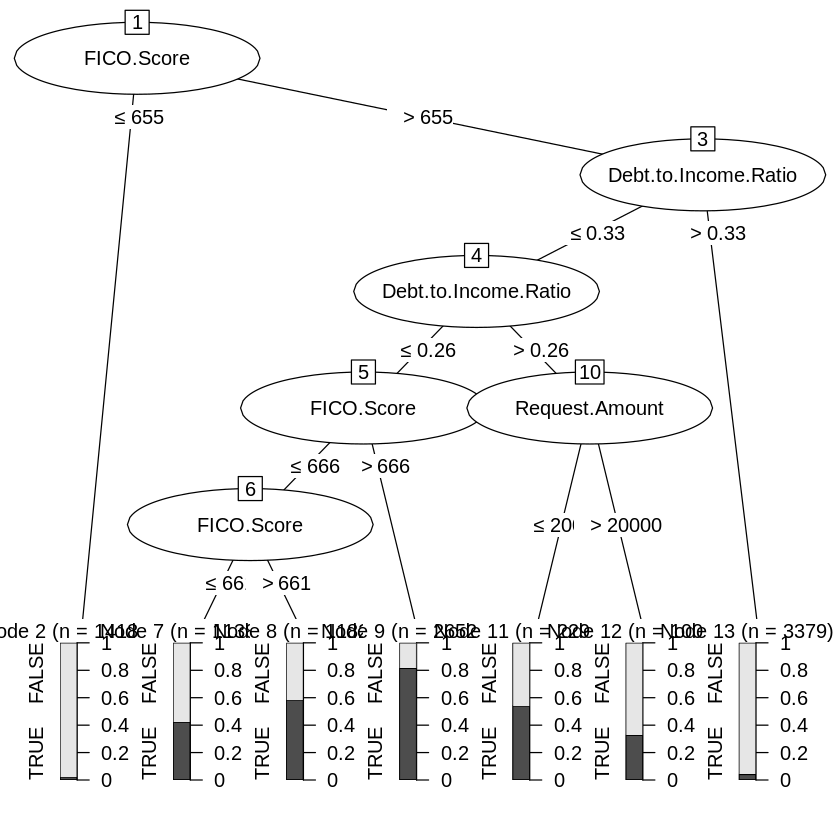

In [28]:
plot(c5_model_test1)

# Display confusion matrix on testDF

In [29]:
c5_model_prediction2 <- predict(c5_model_test1, testDF, type = "class") 
confusionMatrix(table(testDF$Approval, c5_model_prediction2))

Confusion Matrix and Statistics

       c5_model_prediction2
        FALSE  TRUE
  FALSE 18448  6486
  TRUE   1254 23510
                                         
               Accuracy : 0.8443         
                 95% CI : (0.841, 0.8474)
    No Information Rate : 0.6036         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6887         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9364         
            Specificity : 0.7838         
         Pos Pred Value : 0.7399         
         Neg Pred Value : 0.9494         
             Prevalence : 0.3964         
         Detection Rate : 0.3712         
   Detection Prevalence : 0.5017         
      Balanced Accuracy : 0.8601         
                                         
       'Positive' Class : FALSE          
                                       

# Accuracy for c5.0 model

In [30]:
c5_model_accuracy2 <- sum( c5_model_prediction2 == testDF$Approval ) / length( c5_model_prediction2 )* 100
cat('C5 model accuracy on testDF is : ',c5_model_accuracy2)

C5 model accuracy on testDF is :  84.42593

We are getting 84.42 percent of accuracy using c5.0 model on testDF.

# Compare model



In [31]:
value1 <- paste("CART_train", format(round(cart_model_accuracy1, 2), nsmall = 2), sep=":")
value2 <- paste("CART_test", format(round(cart_model_accuracy2, 2), nsmall = 2), sep=":")
value3 <- paste("C5.0_train", format(round(c5_model_accuracy1, 2), nsmall = 2), sep=":")
value4 <- paste("C5.0_test", format(round(c5_model_accuracy2, 2), nsmall = 2), sep=":")

labels <- c(value1,value2,value3,value4)
accuracy_model = c(cart_model_accuracy1, cart_model_accuracy2, c5_model_accuracy1,c5_model_accuracy2)

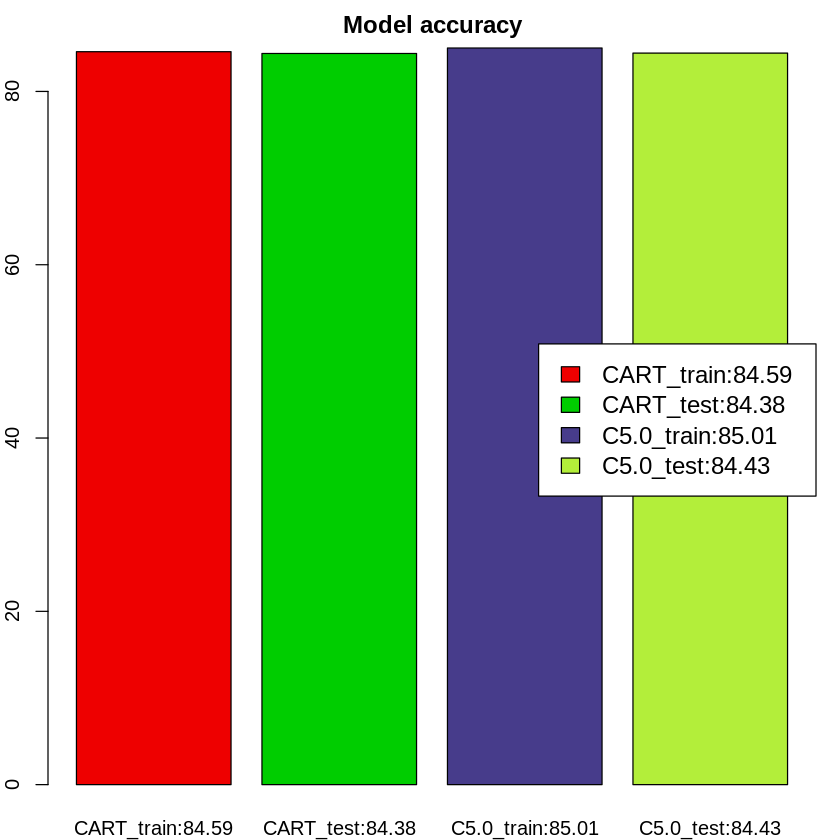

In [32]:
par(mar=c(2, 2, 2, 1))
barplot(accuracy_model, main = "Model accuracy",ylab = "count", xlab = 'Models',names.arg = labels,
col=c("red2", "green3", "slateblue4", "olivedrab2"),width=15,
        legend.text = labels,
        args.legend=list(cex=1.2,x="right"))

#Summary: 
We created two model using Cart and two model using c5.0. Later, we implemented a decision tree and a confusion matrix. In comparing, we found that we are getting almost the same accuracy for all models. In the decision tree, we can plainly see the differences between all models. The decision tree for all  models is structured differently. 


if we talk about only loan training data then we are also getting different decision tree for cart and c5 model. Here, Fico.score is the root node in the cart model, but Debt_to_Income_Rate is the root node in the c5 model. similary at each level, we are getting different node for both models.
